# Список необходимых функций:

1) Объявлять, обучать и делать предсказание с помощью модели (fit, predict, predict_proba)

2) Разбивать выборку на трейн и тест: train_test_split

3) Проверять качество модели на кросс-валидации: cross_val_score

4) Подбирать гиперпараметры модели по кросс-валидации: GridSearchCV

5) Уметь делать пайплайны (Pipeline) + подбирать гиперпараметры моделей из пайплайна по кросс-валидации (GridSearchCV).

# Больше практики.

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Попытаемся ответить на вопрос, что делать, если качество модели нас не устраивает?

Есть несколько путей решения:

a) добавить признаков

б) добавить данных

в) усложнить/упростить/поменять модель

Изначально не очевидно, какой (или какие) подходы позволят улучшить качество модели.

Посмотрим на пример. Будем работать с данными по оттоку клиентов телеком-оператора.

In [2]:
data = pd.read_csv('telecom_churn.csv').drop('State', axis=1)
data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Преобразуйте колонку International plan таким образом, чтобы вместо Yes в ней стояла 1, а вместо No - 0.

Аналогичным образом преобразуйте колонку Voice mail plan.

Затем преобразуйте значения колонки Churn (целевой столбец) в 1 (если True) и 0 (если False).

In [3]:
#your code here
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].astype(int)

In [4]:
data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак из таблицы data и целевой вектор (data['Churn']), затем выкиньте из матрицы вектор 'Churn'.

In [5]:
#your code here
y = data['Churn']
X = data.drop('Churn', axis=1)

X.shape, y.shape

((3333, 18), (3333,))

Перед применением линейной модели **необходимо масштабировать признаки**. Создадим пайплайн, в котором сначала происходит масштабирование, а затем применяется модель. В данном случае будем использовать логистическую регрессию.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([('scaler', StandardScaler()), \
                       ('logit', LogisticRegression(class_weight='balanced'))])

Обучите модель (logit_pipe) по кросс-валидации и выведите на экран roc-auc (используйте функцию cross_val_score).

In [26]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# logit_pipe.fit(Xtrain, ytrain)

# pred = logit_pipe.predict(Xtest)

cross_val_score - внутри этой функции происходит разбиение данных на фолды, обучение, предсказание и вычисление значения метрики.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(logit_pipe, X, y, cv=3, scoring='roc_auc').mean()

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were a

0.8171014492753623

Как правило, подбор гиперпараметров алгоритма улучшает его качество. Подберём значение параметра регуляризации C в логистической регрессии по кросс-валидации, используя GridSearchCV.

In [ ]:
model = LogisticRegression()

param = {'C': [1, 10, 100]}

In [13]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'logit__C': np.logspace(-2, 0, 20)}

#your code here
grid_logit = GridSearchCV(logit_pipe, param_grid, cv=3, n_jobs=-1)
grid_logit.fit(X, y)

Wall time: 549 ms


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [14]:
grid_logit.best_params_, grid_logit.best_score_

({'logit__C': 0.01}, 0.8622862286228623)

$1, x_1, x_2$

Добавим квадратичные признаки: $1, x_1, x_2, x_1^2, x_2^2, x_1x_2$

Добавим признаки степени три: $1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2, x_1x_2^2$

Попробуем улучшить модель путём добавления новых признаков. **Добавьте в модель все квадратичные признаки, используя функцию PolynomialFeatures**.

Тогда происходит три действия: масштабирование, добавление признаков и применение модели. Объедините их в один пайплайн.

In [15]:
#your code here
logit_pipe2 = Pipeline([('scaler', StandardScaler()),
                        ('features', PolynomialFeatures(degree=2)),
                        ('logit', LogisticRegression())])

Подберите значение параметра C по кросс-валидации

In [16]:
%%time

param_grid = {'logit__C': np.logspace(-2, 0, 20)}

#your code here
grid_logit2 = GridSearchCV(logit_pipe2, param_grid, cv=3, n_jobs=-1)
grid_logit2.fit(X, y)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Wall time: 12.9 s


In [17]:
grid_logit2.best_params_, grid_logit2.best_score_

({'logit__C': 1.0}, 0.9096909690969097)

### Комментарии

1. Ошибка на обучающей выборке сама по себе ничего не говорит о качестве модели

2. Кросс-валидационная ошибка показывает, насколько хорошо модель подстраивается под данные (имеющийся тренд в данных), сохраняя при этом способность обобщения на новые данные

3. В данной задаче качество модели улучшилось при добавлении квадратичных признаков.

### Применим метод K ближайших соседей для решения задачи.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

cross_val_score(knn_model, X, y, cv=3, scoring='roc_auc').mean()

0.6761120191783808

Подберите число соседей n_neighbors в методе с помощью GridSearchCV. Какое число соседей получилось оптимальным? Какое качество показал алгоритм на кросс-валидации?

In [19]:
%%time

#your code here
param_grid = {'n_neighbors': np.arange(1, 10, 1)}

grid_knn = GridSearchCV(knn_model, param_grid, cv=3, n_jobs=-1)
grid_knn.fit(X, y)

Wall time: 7.78 s


In [20]:
grid_knn.best_params_, grid_knn.best_score_

({'n_neighbors': 9}, 0.8790879087908791)

Добавьте квадратичных признаков в модель и создайте пайплайн из добавления признаков и применения метода KNN. Найдите оптимальное количество соседей по кросс-валидации. Какое количество соседей получилось в этой модели? Какое качество показал алгоритм на кросс-валидации?

In [21]:
#your code here
knn_pipe3 = Pipeline([('scaler', StandardScaler()),
                      ('features', PolynomialFeatures(degree=2)),
                      ('knn', KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': np.arange(1, 10, 1)}

grid_knn2 = GridSearchCV(knn_pipe3, param_grid, cv=3, n_jobs=-1)
grid_knn2.fit(X, y)

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
grid_knn2.best_params_, grid_knn2.best_score_

({'knn__n_neighbors': 3}, 0.8895889588958896)

# Задание.

Примените метод опорных векторов для решения данной задачи. 

Используйте пайплайн, состоящий из масштабирования, извлечения квадратичных признаков и применения SVM.

Вычислите качество алгоритма на кросс-валидации.

In [ ]:
from sklearn.svm import SVC

#your code here

Подберите значение параметра регуляризации C по кросс-валидации и нарисуйте валидационную кривую, отражающую качество в зависимости от C. Сделайте выводы.

In [ ]:
#your code here

Посмотрите на количество 0 и 1 в целевой переменной. Является ли выборка сбалансированной?

In [24]:
#your code here
sum(y), len(y)-sum(y)

(483, 2850)

Добавьте в обученную выше последнюю версию логистической регрессии параметр **class_weight = 'balanced'**. Посмотрите на качество на кросс-валидации.

In [ ]:
#your code here

Аналогично - добавьте в модель SVM параметр class_weight = 'balanced' и выведите на экран качество алгоритма на кросс-валидации.

In [ ]:
#your code here

Посмотрим, улучшит ли качество применение SVM с ядром. Попробуйте использовать SVM с различными ядрами для данной задачи. 

Для каждого ядра подберите значение параметра C по кросс-валидации.

Для наилучшего из алгоритмов выведите график learning curve.

In [ ]:
#your code here

# Решающие деревья

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевая переменная — расстояние от объекта до точки (0, 0).

Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации

In [28]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Сгенерируем выборку

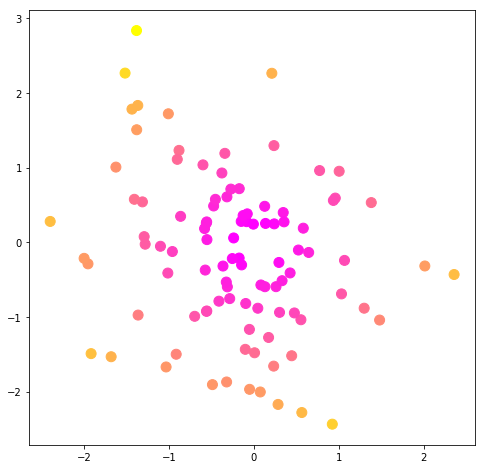

In [29]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

Обучим дерево на сгенерированных данных и предскажем ответы для каждой точки решетки

[[-3.39595778 -3.43470658]
 [-3.38595778 -3.43470658]
 [-3.37595778 -3.43470658]
 ...
 [ 3.33404222  3.82529342]
 [ 3.34404222  3.82529342]
 [ 3.35404222  3.82529342]]


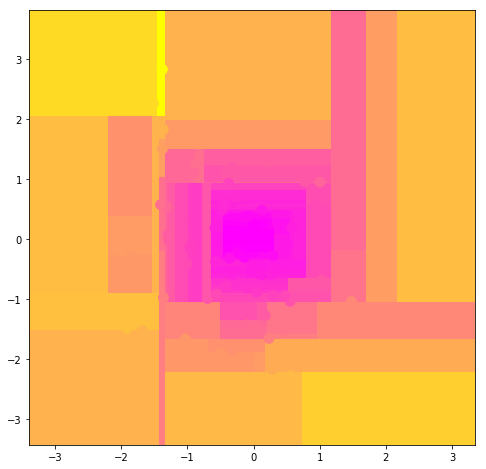

In [30]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)
print(np.c_[xx.ravel(), yy.ravel()])

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

### Задание

Сейчас мы сгенерировали 100 точек из нормального распределения и обучили решающее дерево на них. Сгенерируйте 300 точек из нормального распределения, обучите на них дерево и выведите на экран результат (как на картинке выше).

Сгенерированные точки и расстояние до точек сохраните в массивы data_x300, data_y300, для обучения и предсказания используйте эти массивы.

Улучшилось ли предсказание алгоритма на решётке? (т.е. стала ли раскраска всей плоскости более правильной?)

In [ ]:
#your code here

Вернёмся к исходным данным (100 точек).

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

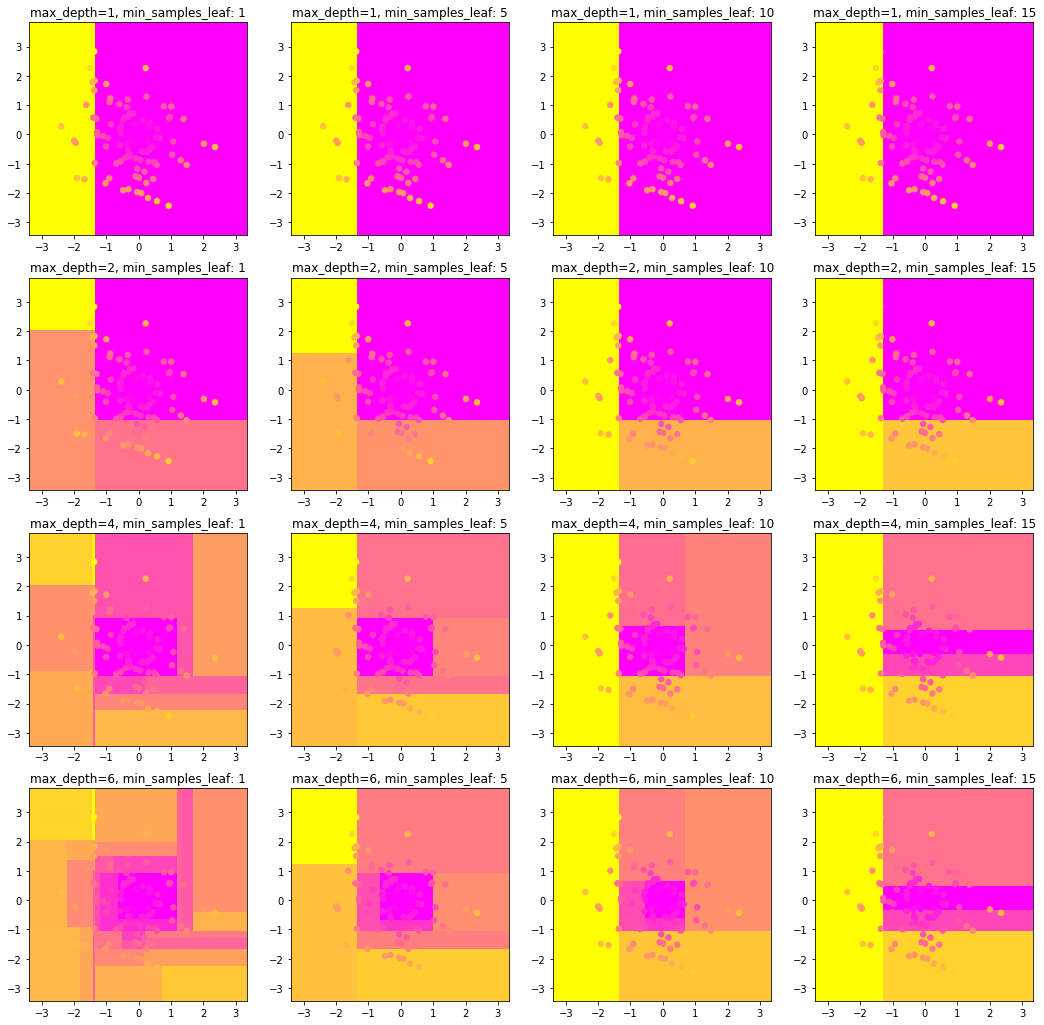

In [31]:
plt.figure(figsize=(18, 18))
for i, max_depth in enumerate([1, 2, 4, 6]):
    for j, min_samples_leaf in enumerate([1, 5, 10, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((4, 4), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Как влияет увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе на качество на обучающей выборке? на переобучение?

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.

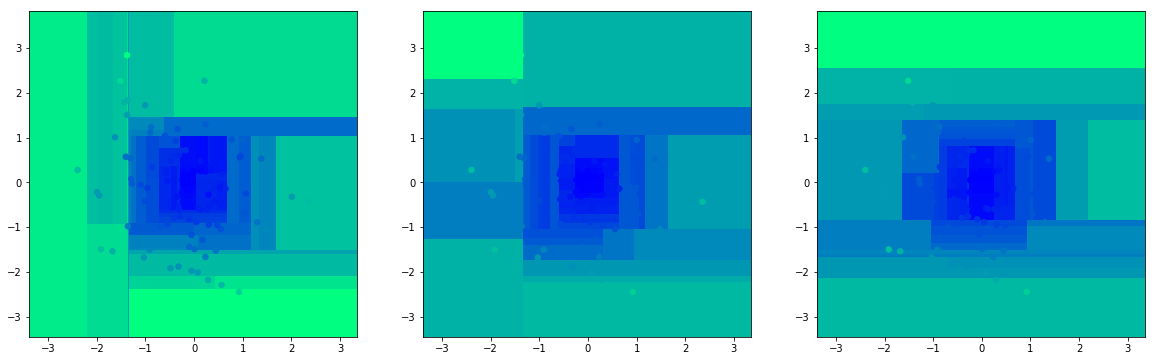

In [32]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

In [ ]:
X = data.data
y = data.target

X.shape

- будем оценивать качество алгоритма по кросс-валидации

Можем зафиксировать разбиение на фолды, чтобы затем каждый раз использовать одно и то же разбиение при кросс-валидации, это полезно при сравнении алгоритмов

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

Выведите качество DecisionTreeRegressor, обученного на данных X, y по кросс-валидации. В функции cross_val_score в качестве cv поставьте cv=cv, в качестве метрики - 'neq_mean_squared_error'

In [ ]:
#your code here

### Задание

Метрика MSЕ имеет не ограничена сверху. Поэтому для оценки качества алгоритма можно также пользоваться метрикой R2 (коэффициент детерминации), так как он не превышает 1 (и чем ближе к 1, тем лучше).

Выведите на экран значение R2 алгоритма ('r2').

In [ ]:
#your code here

Для сравнения качества модели при различных наборах параметров или для сравнения моделей на одном датасете можно использовать, как и раньше, MSE.

Будем подбирать параметры решающего дерева по сетке с целью увеличить качество алгоритма. Будем подбирать значения max_features и max_depth.

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

Подберите по кросс-валидации оптимальные значения max_features и max_depth. В функции GridSearchCV в качестве cv поставьте заранее фиксированное разбиение (cv=cv), метрику качества используйте scoring='neq_mean_squared_error'

In [ ]:
params={'max_features': [None, 'log2', 'sqrt'], 
        'max_depth': [2, 4, 6, 8, 10, 20, 50]},

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, n_jobs=-1)

gs.fit(X, y)

Выведем на экран средние значения и стандартные отклонения, полученные при GridSearch.

In [ ]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

# Задание

Теперь попробуем одновременно подбирать значения max_features, max_depth и min_samples_leaf. Ищите min_samples_leaf в диапазоне от 1 до 20 с шагом 1.

In [ ]:
#your code here

In [ ]:
gs.best_score_

Как в данной задаче зависит качество алгоритма от количества параметров, которые мы оптимизируем?

# Домашнее задание
Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

A. Решите задачу с помощью DecisionTreeClassifier:
- подберите гиперпараметры алгоритма по кросс-валидации
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

C. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты B и C можно скомбинировать для достижения наилучшего качества.

Далее попробуйте решить исходную задачу линейными методами. Не забудьте масштабировать данные перед применением этих методов:

D. Решите исходную задачу с помощью логистической регрессии.

E. Решите исходную задачу с помощью SVMClassifier с линейным и нелинейными ядрами.

F. Решите исходную задачу с помощью наивного байесовского классификатора (https://scikit-learn.org/stable/modules/naive_bayes.html).

G. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик MSE и R2?

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [ ]:
#your code here